In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
 
from sklearn.multioutput import MultiOutputClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# import pandas as pd

# # Assuming 'data_train' is your DataFrame with numeric columns
# # Replace 'data_train' with your actual DataFrame variable

# # Function to remove outliers from specific columns using IQR
# def remove_outliers_iqr_specific_columns(df, columns, iqr_multiplier=1.5):
#     result_df = df.copy()
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         result_df = result_df[~((result_df[col] < (Q1 - iqr_multiplier * IQR)) | (result_df[col] > (Q3 + iqr_multiplier * IQR)))]
#     return result_df

# # Specify the columns you want to apply outlier removal to
# columns_to_remove_outliers = ['Sum_of_Luminosity','Y_Maximum', 'Y_Minimum']

# # Apply the function to the specified columns in the DataFrame
# filtered_data_iqr_specific_columns = remove_outliers_iqr_specific_columns(train_data, columns_to_remove_outliers)

# # Handle NaN values after outlier removal
# filtered_data_iqr_specific_columns = filtered_data_iqr_specific_columns.dropna()

# # Print the shape of the original and filtered datasets
# print(f"Original data shape: {train_data.shape}")
# print(f"Filtered data shape (using IQR for specific columns): {filtered_data_iqr_specific_columns.shape}")

# # Optional: Visualize the removed outliers for each specified column
# outliers_iqr_dict_specific_columns = {}
# for col in columns_to_remove_outliers:
#     outliers_iqr_dict_specific_columns[col] = train_data[col][~train_data[col].isin(filtered_data_iqr_specific_columns[col])]

# # Print the shape of outliers for each specified column
# for col, outliers in outliers_iqr_dict_specific_columns.items():
#     print(f"Outliers in '{col}' (using IQR for specific columns): {outliers.shape}")


In [4]:
X_train = train_data.drop(['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
                           'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y_train = train_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
                      'Dirtiness', 'Bumps', 'Other_Faults']]

In [5]:
X_train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

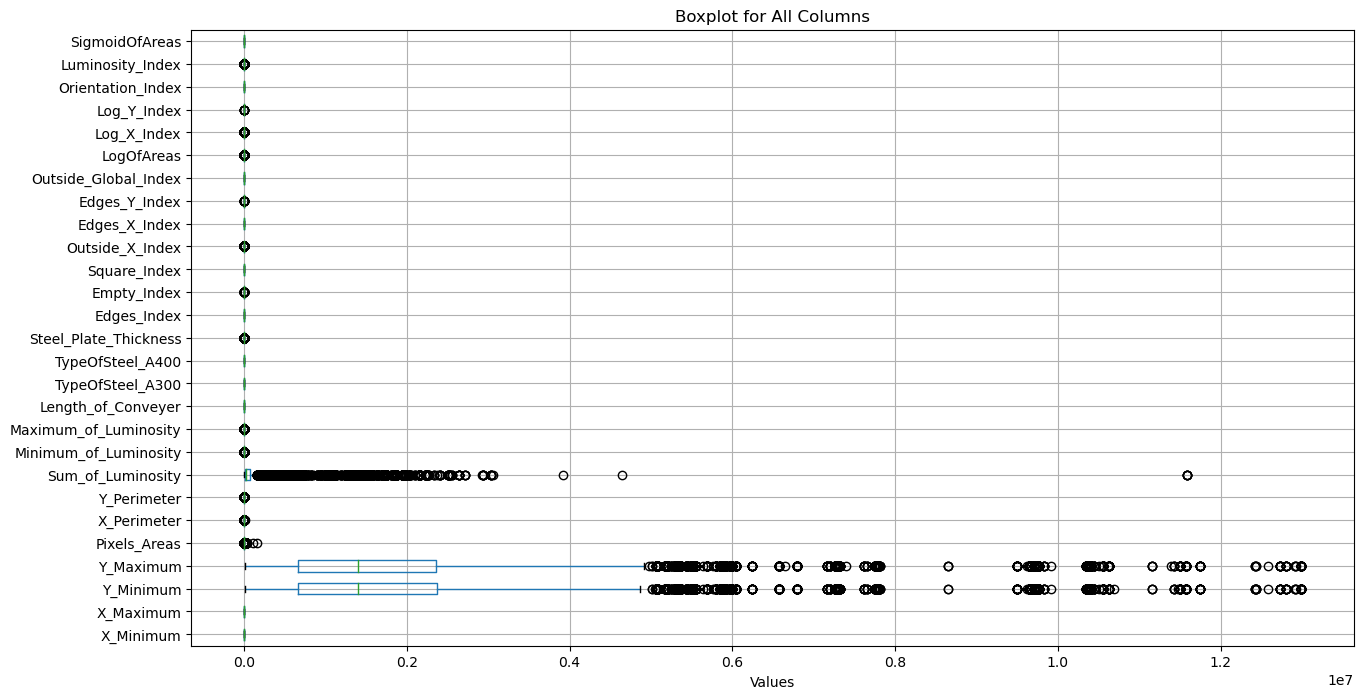

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'your_data' is your DataFrame with numeric columns
# Replace 'your_data' with your actual DataFrame variable

# Create a boxplot for all columns
X_train.boxplot(figsize=(15, 8), vert=False)
plt.title('Boxplot for All Columns')
plt.xlabel('Values')
plt.show()


In [7]:
rf_classifier = RandomForestClassifier()
lgbm_classifier = LGBMClassifier()
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier()
extratrees_classifier = ExtraTreesClassifier()
GradientBoosting_Classifier= GradientBoostingClassifier()

In [8]:
rf_multi_classifier = MultiOutputClassifier(rf_classifier, 
                                            n_jobs=-1)
lgbm_multi_classifier = MultiOutputClassifier(lgbm_classifier, 
                                              n_jobs=-1)
xgb_multi_classifier = MultiOutputClassifier(xgb_classifier, 
                                             n_jobs=-1)
catboost_multi_classifier = MultiOutputClassifier(catboost_classifier, 
                                                  n_jobs=-1)
extratrees_multi_classifier = MultiOutputClassifier(extratrees_classifier, 
                                                    n_jobs=-1)
GradientBoosting_multi_Classifier = MultiOutputClassifier(GradientBoosting_Classifier, 
                                                    n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)
best_rf_params = rf_grid.best_params_

# LightGBM
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

lgbm_grid = GridSearchCV(LGBMClassifier(), param_grid=lgbm_params, scoring='accuracy', cv=5)
lgbm_grid.fit(X_train, y_train)
best_lgbm_params = lgbm_grid.best_params_

# XGBoost
xgb_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(), param_grid=xgb_params, scoring='accuracy', cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb_params = xgb_grid.best_params_

# CatBoost
catboost_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0]
}

catboost_grid = GridSearchCV(CatBoostClassifier(), param_grid=catboost_params, scoring='accuracy', cv=5)
catboost_grid.fit(X_train, y_train)
best_catboost_params = catboost_grid.best_params_

# Extra Trees
extratrees_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

extratrees_grid = GridSearchCV(ExtraTreesClassifier(), param_grid=extratrees_params, scoring='accuracy', cv=5)
extratrees_grid.fit(X_train, y_train)
best_extratrees_params = extratrees_grid.best_params_

# Gradient Boosting
gradboost_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

gradboost_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=gradboost_params, scoring='accuracy', cv=5)
gradboost_grid.fit(X_train, y_train)
best_gradboost_params = gradboost_grid.best_params_


In [ ]:
# rf_cv_scores = cross_val_score(rf_multi_classifier, X_train, y_train, 
#                                cv=5, scoring='accuracy',)
# lgbm_cv_scores = cross_val_score(lgbm_multi_classifier, X_train, y_train, 
#                                  cv=5, scoring='accuracy')
# xgb_cv_scores = cross_val_score(xgb_multi_classifier, X_train, y_train, 
#                                 cv=5, scoring='accuracy')
# catboost_cv_scores = cross_val_score(catboost_multi_classifier, X_train, y_train, 
#                                      cv=5, scoring='accuracy')
# extratrees_cv_scores = cross_val_score(extratrees_multi_classifier, X_train, y_train, 
#                                        cv=5, scoring='accuracy')
# GradientBoosting_cv_scores = cross_val_score(GradientBoosting_multi_Classifier, X_train, y_train, 
#                                        cv=5, scoring='accuracy')

In [ ]:
print("Random Forest CV Accuracy:", rf_cv_scores.mean())
print("LightGBM CV Accuracy:", lgbm_cv_scores.mean())
print("XGBoost CV Accuracy:", xgb_cv_scores.mean())
print("CatBoost CV Accuracy:", catboost_cv_scores.mean())
print("ExtraTrees CV Accuracy:", extratrees_cv_scores.mean())
print("GradientBoosting CV Accuracy:", GradientBoosting_cv_scores.mean())

In [ ]:
best_model = max([
    (rf_cv_scores.mean(), 'Random Forest'),
    (lgbm_cv_scores.mean(), 'LightGBM'),
    (xgb_cv_scores.mean(), 'XGBoost'),
    (catboost_cv_scores.mean(), 'CatBoost'),
    (extratrees_cv_scores.mean(), 'ExtraTrees'),
    (GradientBoosting_cv_scores.mean(), 'GradientBoosting')
])

print("Best Model:", best_model[1])

In [ ]:
best_classifier = None
if best_model[1] == 'Random Forest':
    best_classifier = rf_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'LightGBM':
    best_classifier = lgbm_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'XGBoost':
    best_classifier = xgb_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'CatBoost':
    best_classifier = catboost_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'ExtraTrees':
    best_classifier = extratrees_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'GradientBoosting':     
    best_classifier = GradientBoosting_multi_Classifier.fit(X_train, y_train)

In [ ]:
model = joblib.dump(best_classifier, 'best_model.joblib')

In [ ]:
test_ids=test_data["id"]
test_features=test_data.drop("id",axis=1)

In [ ]:
best_test_probs = best_classifier.predict_proba(test_features)

In [ ]:

best_test_probs

In [ ]:
submission_df = pd.DataFrame({'id': test_ids})
# Iterate over each target
for i, target in enumerate(y_train.columns):
    # Fetch the probability of the positive class for each target
    # Store the positive probabilities in the respective target column
    submission_df[target] = best_test_probs[i][:, 1]  # Probability of positive class

submission_df.to_csv('submission.csv', index=False)

In [ ]:
import time
# Generate submission file
submission_df = pd.DataFrame({'id': test_ids})
# Iterate over each target
for i, target in enumerate(y_train.columns):
    # Fetch the probability of the positive class for each target
    # Store the positive probabilities in the respective target column
    submission_df[target] = best_test_probs[i][:, 1]  # Probability of positive class
    time.sleep(6)
    print(submission_df) 
submission_df.to_csv('submission.csv', index=False)

In [ ]:
y_train.columns

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from sklearn.multioutput import MultiOutputClassifier
from catboost import CatBoostClassifier

def load_train_file():
    train_file = filedialog.askopenfilename(title="Select Train File")
    if train_file:
        train_entry.delete(0, tk.END)
        train_entry.insert(0, train_file)
        messagebox.showinfo("File Loaded", "Train file loaded successfully!")
    else:
        messagebox.showerror("Error", "Please select a train file.")

def load_test_file():
    test_file = filedialog.askopenfilename(title="Select Test File")
    if test_file:
        test_entry.delete(0, tk.END)
        test_entry.insert(0, test_file)
        messagebox.showinfo("File Loaded", "Test file loaded successfully!")
    else:
        messagebox.showerror("Error", "Please select a test file.")

def train_and_predict():
    train_file = train_entry.get()
    test_file = test_entry.get()
    
    if not train_file or not test_file:
        messagebox.showerror("Error", "Please select both train and test files.")
        return
    
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    
    X_train = train_data.drop(['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
                               'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
    y_train = train_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
                          'Dirtiness', 'Bumps', 'Other_Faults']]
    
    catboost_classifier = CatBoostClassifier()

    best_model = MultiOutputClassifier(catboost_classifier, n_jobs=-1).fit(X_train, y_train)

    test_ids = test_data['id']
    test_features = test_data.drop('id', axis=1)
    best_test_probs = best_model.predict_proba(test_features)

    submission_df = pd.DataFrame({'id': test_ids})
    for i, target in enumerate(train_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].columns):
        submission_df[target] = best_test_probs[i][:, 1]

    submission_df.to_csv('submission.csv', index=False)
    messagebox.showinfo("Info", "Prediction completed and submission file generated!")

root = tk.Tk()
root.title("Fault Classification Model")

train_frame = tk.Frame(root)
train_frame.pack(pady=10)

train_label = tk.Label(train_frame, text="Train File:")
train_label.grid(row=0, column=0, padx=5, pady=5)

train_entry = tk.Entry(train_frame, width=40)
train_entry.grid(row=0, column=1, padx=5, pady=5)

train_button = tk.Button(train_frame, text="Browse", command=load_train_file)
train_button.grid(row=0, column=2, padx=5, pady=5)

test_frame = tk.Frame(root)
test_frame.pack(pady=10)

test_label = tk.Label(test_frame, text="Test File:")
test_label.grid(row=0, column=0, padx=5, pady=5)

test_entry = tk.Entry(test_frame, width=40)
test_entry.grid(row=0, column=1, padx=5, pady=5)

test_button = tk.Button(test_frame, text="Browse", command=load_test_file)
test_button.grid(row=0, column=2, padx=5, pady=5)

predict_button = tk.Button(root, text="Predict", command=train_and_predict)
predict_button.pack(pady=5)

root.mainloop()